# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

In [3]:
df = pd.read_csv('sentiment_analysis.csv')
df

,Year,Month,Day,Time of Tweet,text,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",Facebook
2,2017,8,18,night,Don't angry me,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",Instagram
...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,Twitter


# EDA

In [4]:
colors = ['#FFB703', '#219EBC', 'lightgreen', '#FB8500', 'white', '#023047']

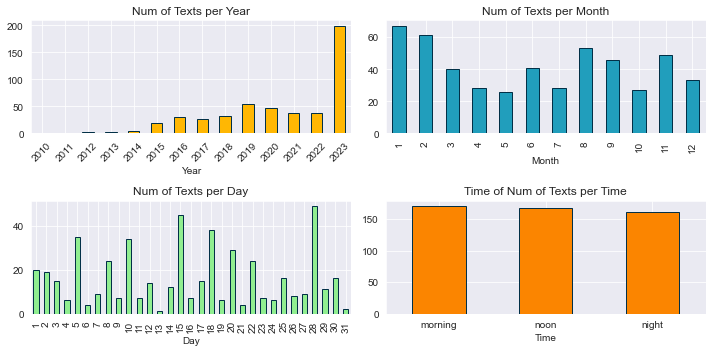

In [63]:
fig,ax = plt.subplots(2,2, figsize=(15,15))

df['Year'].value_counts().sort_index().plot(kind='bar',
                                                 title='Num of Texts per Year',
                                                 color=colors[0],
                                                 edgecolor=colors[-1],
                                                 figsize=(10,5),
                                                 xlabel='Year',
                                                 rot=45,
                                                 ax=ax[0,0])

df['Month'].value_counts().sort_index().plot(kind='bar',
                                         title='Num of Texts per Month',
                                         color=colors[1],
                                         edgecolor=colors[-1],
                                         figsize=(10,5),
                                         xlabel='Month',
                                         rot=90,
                                         ax=ax[0,1])

df['Day'].value_counts().sort_index().plot(kind='bar',
                                         title='Num of Texts per Day',
                                         color=colors[2],
                                         edgecolor=colors[-1],
                                         figsize=(10,5),
                                         xlabel='Day',
                                         rot=90,
                                         ax=ax[1,0])

df['Time of Tweet'].value_counts().plot(kind='bar',
                                         title='Time of Num of Texts per Time',
                                         color=colors[3],
                                         edgecolor=colors[-1],
                                         figsize=(10,5),
                                         xlabel='Time',
                                         rot=0,
                                         ax=ax[1,1])

plt.tight_layout()
plt.show()

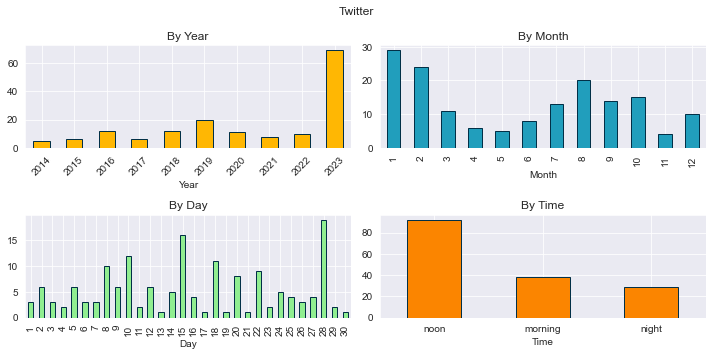

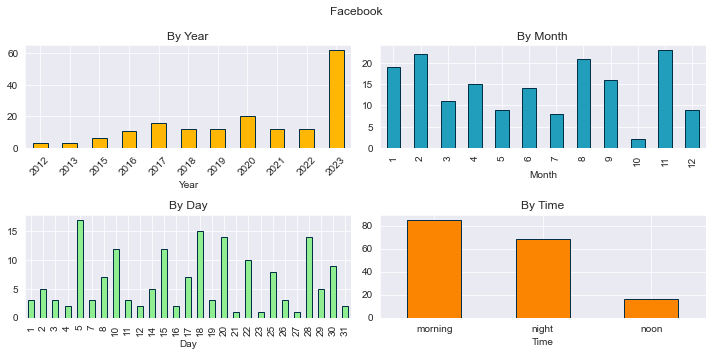

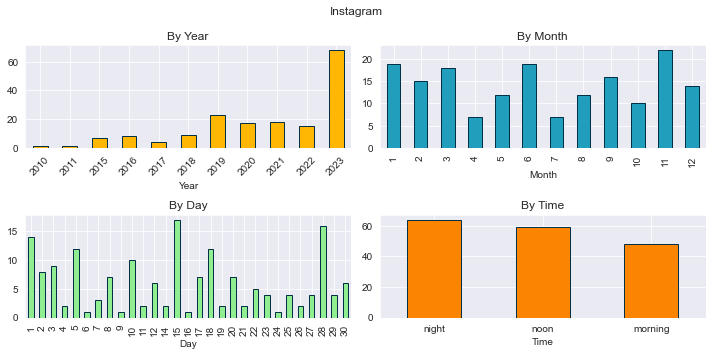

In [67]:
for platform in df['Platform'].unique():
    fig,ax = plt.subplots(2,2, figsize=(15,15))

    df[df['Platform']==platform]['Year'].value_counts().sort_index().plot(kind='bar',
                                                    title='By Year',
                                                    color=colors[0],
                                                    edgecolor=colors[-1],
                                                    figsize=(10,5),
                                                    xlabel='Year',
                                                    rot=45,
                                                    ax=ax[0,0])

    df[df['Platform']==platform]['Month'].value_counts().sort_index().plot(kind='bar',
                                            title='By Month',
                                            color=colors[1],
                                            edgecolor=colors[-1],
                                            figsize=(10,5),
                                            xlabel='Month',
                                            rot=90,
                                            ax=ax[0,1])

    df[df['Platform']==platform]['Day'].value_counts().sort_index().plot(kind='bar',
                                            title='By Day',
                                            color=colors[2],
                                            edgecolor=colors[-1],
                                            figsize=(10,5),
                                            xlabel='Day',
                                            rot=90,
                                            ax=ax[1,0])

    df[df['Platform']==platform]['Time of Tweet'].value_counts().plot(kind='bar',
                                         title='By Time',
                                         color=colors[3],
                                         edgecolor=colors[-1],
                                         figsize=(10,5),
                                         xlabel='Time',
                                         rot=0,
                                         ax=ax[1,1])

    plt.suptitle(platform)
    plt.tight_layout()
    plt.show()

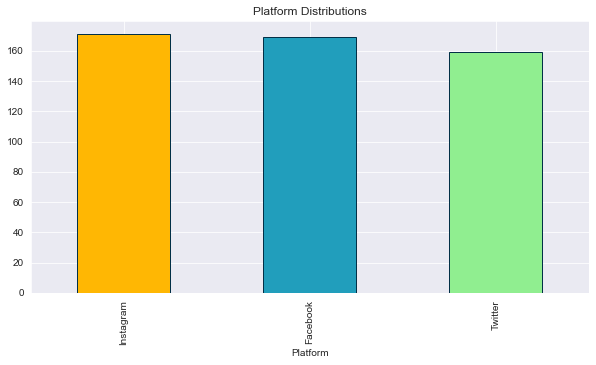

In [48]:
df['Platform'] = df['Platform'].str.strip()
ax = df['Platform'].value_counts().plot(kind='bar',
                                         title='Platform Distributions',
                                         color=colors,
                                         edgecolor=colors[-1],
                                         figsize=(10,5))

ax.set_xlabel('Platform')
plt.show()

# Model

In [8]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Calculate Sentiment

In [9]:
def sentiment_score(text):
    tokens = tokenizer.encode(text, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [10]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_score(x))
df 

,Year,Month,Day,Time of Tweet,text,Platform,sentiment
0,2018,8,18,morning,What a great day!!! Looks like dream.,Twitter,5
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",Facebook,1
2,2017,8,18,night,Don't angry me,Facebook,5
3,2022,6,8,morning,We attend in the class just for listening teac...,Facebook,1
4,2022,6,8,noon,"Those who want to go, let them go",Instagram,1
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",Twitter,3
495,2021,2,25,morning,the plan to not spend money is not going well,Instagram,1
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,Facebook,5
497,2018,8,10,night,congratulations ! you guys finish a month ear...,Twitter,5


# Conclusion

In [68]:
df['Platform'].value_counts()

Platform
Instagram    171
Facebook     169
Twitter      159
Name: count, dtype: int64

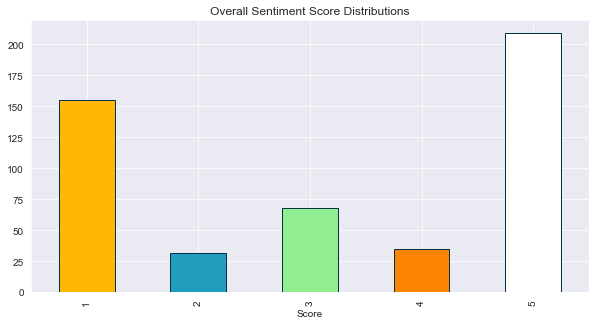

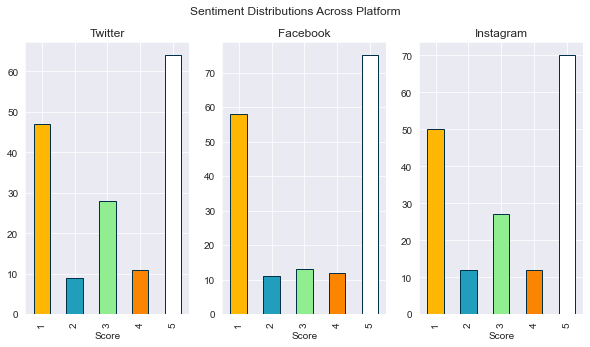

In [47]:
df['sentiment'].value_counts().sort_index().plot(kind='bar',
                                    title='Overall Sentiment Score Distributions',
                                    color=colors,
                                    edgecolor=colors[-1],
                                    figsize=(10,5),
                                    xlabel='Score')



fig, ax= plt.subplots(1,3, figsize=(12,3))
for i, platform in enumerate(df['Platform'].unique()):
    df[df['Platform']==platform]['sentiment'].\
        value_counts().sort_index().plot(kind='bar',
                            title=f'{platform}',
                            color=colors,
                            edgecolor=colors[-1],
                            figsize=(10,5),
                            xlabel='Score',
                            ax=ax[i])

fig.suptitle('Sentiment Distributions Across Platform')
plt.show()